<a href="https://colab.research.google.com/github/Phavour-EBEN/Deep-Learning-with-Udacity/blob/main/Time_Series_Forecastimg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time Series Forecasting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Generating trends

In [2]:
def plot_series(time, series, format="_", start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("values")

  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [3]:
def trend(time, slope=0):
  return slope * time

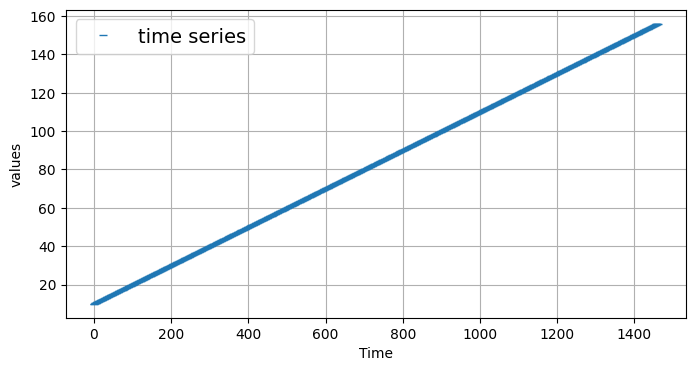

In [4]:
time = np.arange(4*365+1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(8,4))
plot_series(time, series, label="time series")
plt.show()

In [5]:
time,series

(array([   0,    1,    2, ..., 1458, 1459, 1460]),
 array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ]))

Generating Seasonal patterns

In [7]:
def seasonal_pattern(season_time):
  condition = np.where(season_time<0.4, np.cos(season_time*2*np.pi), 1/np.exp(3*season_time))
  return condition

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase) % period)/period
  return amplitude * seasonal_pattern(season_time)

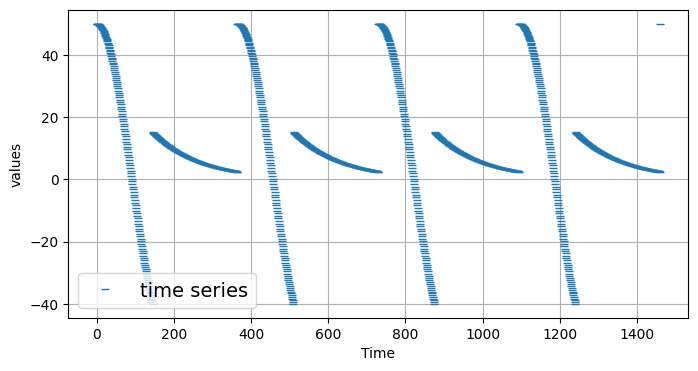

In [9]:
amplitude = 50
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(8,4))
plot_series(time, series, label="time series")
plt.show()

Time series that have both trends and seasonality

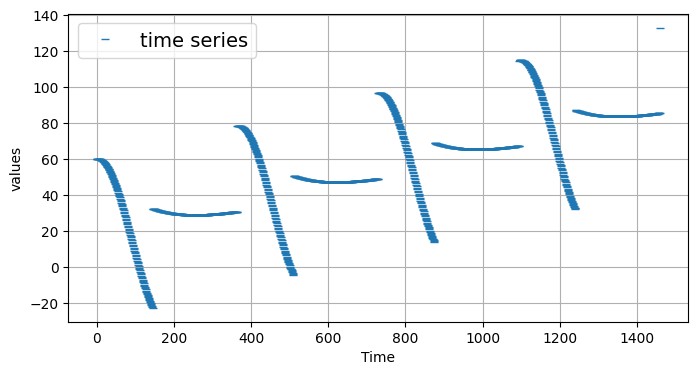

In [10]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude)

plt.figure(figsize=(8,4))
plot_series(time, series, label="time series")
plt.show()

White noise

In [11]:
def white_noise(time, noise_level = 1, seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

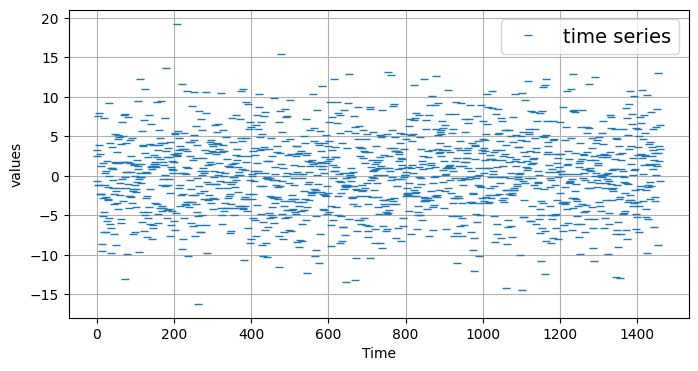

In [15]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(8,4))
plot_series(time, noise, label="time series")
plt.show()


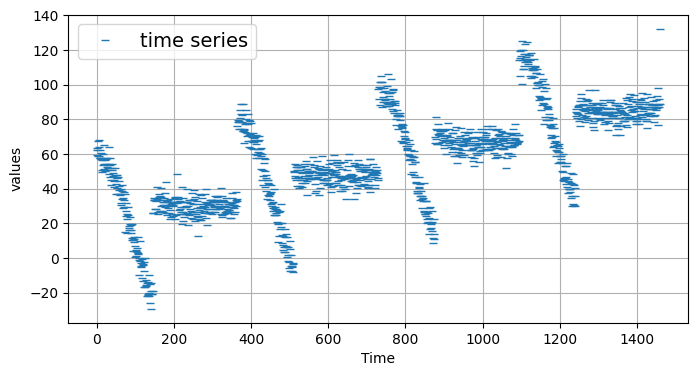

In [16]:
series +=noise

plt.figure(figsize=(8,4))
plot_series(time, series, label="time series")
plt.show()